In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [3]:
flights=pd.read_csv('flights.csv',low_memory=True)

In [38]:
# flights=pd.read_csv('flights.csv')
# flights = flights.iloc[np.r_[0:19999, 500000:519999, 1000000:1019999, 1500000:1519999, 2000000:2019999, 2500000:2519999, 3000000:3019999, 3500000:3519999, 4000000:4019999, 4500000:4519999, 5000000:5019999, 5500000:5019999], :]
# flights.to_csv('flights.csv',index=False)
ranges = [
    (0, 19383),
    (500000, 517701),
    (1000000, 1020800),
    (1500000, 1520009),
    (2000000, 2020498),
    (2500000, 2520783),
    (3000000, 3021476),
    (3500000, 3521056),
    (4000000, 4019176),
    (4500000, 4520051),
    (5000000, 5019301),
    (5500000, 5519765)
]

# Concatenate the slices
flights = pd.concat([flights.iloc[start:end] for start, end in ranges], ignore_index = True)

In [4]:
# flights=pd.read_csv('flights.csv')
# flights = flights.iloc[np.r_[0:19999, 500000:519999, 1000000:1019999, 1500000:1519999, 2000000:2019999, 2500000:2519999, 3000000:3019999, 3500000:3519999, 4000000:4019999, 4500000:4519999, 5000000:5019999, 5500000:5019999], :]
# flights.to_csv('flights.csv',index=False)
ranges = [
    (0, 20000),
    (500000, 520000),
    (1000000, 1020000),
    (1500000, 1520000),
    (2000000, 2020000),
    (2500000, 2520000),
    (3000000, 3020000),
    (3500000, 3520000),
    (4000000, 4020000),
    (4500000, 4520000),
    (5000000, 5020000),
    (5500000, 5520000)
]

# Concatenate the slices
flights = pd.concat([flights.iloc[start:end] for start, end in ranges])

In [5]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519995,2015,12,12,6,NK,188,N534NK,DTW,LGA,1600,...,1732.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5519996,2015,12,12,6,UA,1984,N77871,LAX,IAH,1600,...,2058.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5519997,2015,12,12,6,UA,212,N510UA,EWR,SFO,1600,...,1905.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5519998,2015,12,12,6,UA,533,N482UA,ORD,LGA,1600,...,1853.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
airports=pd.read_csv('airports.csv')
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [7]:
airlines=pd.read_csv('airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [8]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [9]:
airports.dtypes

IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object

In [10]:
columns=airports.loc[:,['LATITUDE','LONGITUDE']]

In [11]:
airports.dropna(inplace=True)

In [12]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [13]:
import gmplot
latitudes=airports.loc[:,'LATITUDE']
longitudes=airports.loc[:,'LONGITUDE']
gmap=gmplot.GoogleMapPlotter(35,102,2)
gmap.scatter(latitudes,longitudes,'red',size=5)
gmap.draw('map/gmplot.html')

In [14]:
from IPython.display import IFrame
IFrame(src='map/gmplot.html',width=900, height=600)

In [15]:
flights.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER               318
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME           2601
DEPARTURE_DELAY          2601
TAXI_OUT                 2702
WHEELS_OFF               2702
SCHEDULED_TIME              0
ELAPSED_TIME             3330
AIR_TIME                 3330
DISTANCE                    0
WHEELS_ON                2814
TAXI_IN                  2814
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             2814
ARRIVAL_DELAY            3330
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    237265
AIR_SYSTEM_DELAY       198163
SECURITY_DELAY         198163
AIRLINE_DELAY          198163
LATE_AIRCRAFT_DELAY    198163
WEATHER_DELAY          198163
dtype: int64

In [16]:
flights1=flights[['MONTH','DAY_OF_WEEK']]
flights1['MONTH']=flights1['MONTH'].map({1:'Jaunary',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
                                         9:'September',10:'October',11:'November',12:'December'})
flights1['DAY_OF_WEEK']=flights1['DAY_OF_WEEK'].map({1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',
                                                         7:'Saturday'})

c:\users\le minh hieu\miniconda3\envs\hocmay\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\le minh hieu\miniconda3\envs\hocmay\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


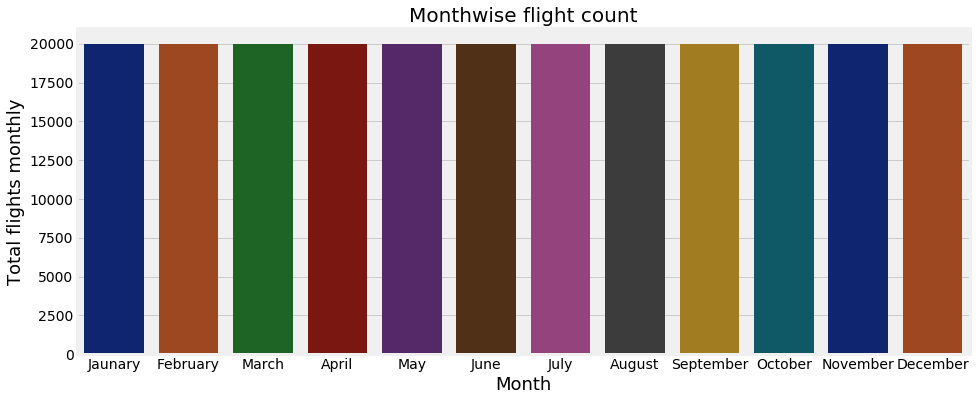

In [17]:
plt.figure(figsize=(16,6))
plt.style.use('fivethirtyeight')
ax=sns.countplot('MONTH',data=flights1,palette='dark',)
ax.set_xlabel(xlabel='Month',fontsize=18)
ax.set_ylabel(ylabel='Total flights monthly',fontsize=18)
ax.set_title(label='Monthwise flight count',fontsize=20)
plt.show()

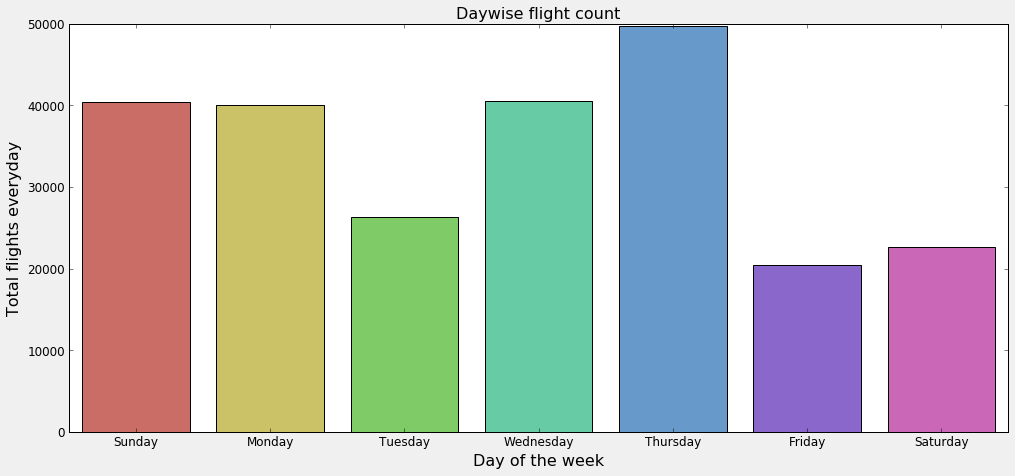

In [18]:
plt.figure(figsize = (15, 7))
plt.style.use('_classic_test')
sns.countplot(x ='DAY_OF_WEEK',data=flights1,palette='hls', order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                                                         'Saturday'])
plt.title('Daywise flight count',fontsize=16)
plt.xlabel('Day of the week', fontsize = 16)
plt.ylabel('Total flights everyday', fontsize = 16)
plt.show()

In [19]:
flights=flights.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                                 'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                                 'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                               axis=1)

In [20]:
flights.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


In [21]:
flights=flights.fillna(flights.mean())
# flights=pd.read_csv('flights_2.csv',low_memory=True)

In [22]:
flights.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588


In [23]:
result=[]

In [24]:
for row in flights['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0) 

In [25]:
flights['result'] = result

In [26]:
flights

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519995,12,12,DTW,LGA,1600,-13.0,1745,1732.0,-13.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
5519996,12,12,LAX,IAH,1600,-3.0,2108,2058.0,-10.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
5519997,12,12,EWR,SFO,1600,6.0,1919,1905.0,-14.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
5519998,12,12,ORD,LGA,1600,-2.0,1909,1853.0,-16.0,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0


In [27]:
flights_1=flights[['MONTH','ARRIVAL_DELAY']]
flights_1['MONTH']=flights_1['MONTH'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',
                                           8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'})

c:\users\le minh hieu\miniconda3\envs\hocmay\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


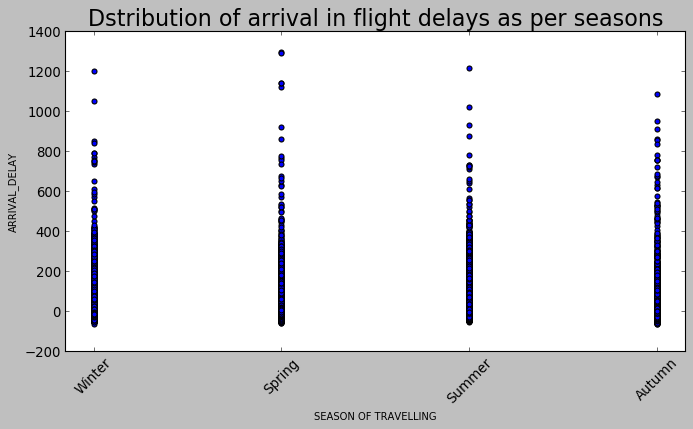

In [28]:
plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(x = flights_1['MONTH'], y = flights_1['ARRIVAL_DELAY'])
plt.xlabel(xlabel = 'SEASON OF TRAVELLING', fontsize = 9)
plt.ylabel(ylabel = 'ARRIVAL_DELAY', fontsize = 9)
plt.title(label = 'Dstribution of arrival in flight delays as per seasons', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

In [29]:
print(flights_1['ARRIVAL_DELAY'].mean())

3.524054590780412


In [30]:
flights=flights.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
1,1,1,10,-8.0,750,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
2,1,1,20,-2.0,806,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
3,1,1,20,-5.0,805,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
4,1,1,25,-1.0,320,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519995,12,12,1600,-13.0,1745,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
5519996,12,12,1600,-3.0,2108,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
5519997,12,12,1600,6.0,1919,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0
5519998,12,12,1600,-2.0,1909,0,0,12.863637,0.100939,19.820303,21.838229,2.54588,0


In [31]:
sc=StandardScaler()
X=flights.drop(columns='result')
Y=flights['result']
X=sc.fit_transform(X)

In [32]:
print(X.mean())
print(X.std())

3.4712973236613226e-18
1.0


In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
clf.score(X_test,Y_test)

0.9989583333333333

In [36]:
grid_param = {
'criterion': ['gini', 'entropy'],
'max_depth' : range(30,31,1),
'min_samples_leaf' : range(35,38,1),
'min_samples_split': range(35,38,1),
'splitter' : ['best', 'random']
}

In [37]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
    param_grid=grid_param,
    cv=5,
    n_jobs =-1)

In [38]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [39]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'min_samples_leaf': 35, 'min_samples_split': 35, 'max_depth': 30, 'splitter': 'best'}


In [40]:
grid_search.best_score_

0.9970833333333333

In [41]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =30, min_samples_leaf= 35, min_samples_split= 35, splitter ='best')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=35,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
clf.score(X_test,Y_test)

0.9971458333333333

In [43]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(clf, open(filename, 'wb'))

In [44]:
loaded_model = pickle.load(open(filename, 'rb'))
print('HI there')
prediction=loaded_model.predict([[1,1,5,-11,430,0,0,13,0,
                                     18,22,3]])
print(prediction)

HI there
[0]


In [45]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [46]:
loaded_model = pickle.load(open(filename, 'rb'))
print('HI there')
prediction=loaded_model.predict([[1,1,5,-11,430,0,0,13,0,
                                     18,22,3]])
print(prediction)

HI there
[0]
